In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
#data = pd.read_csv("../../data/mergeddata2.csv")
data = pd.read_csv("../../data/big.csv")

In [3]:
data.head()

,Src Port,Dest Port,Protocol,Packet
0,1,1,2,1
1,0,0,2,1
2,0,0,0,1
3,1,1,2,0
4,1,1,2,0


In [4]:
# data = data.drop('None', axis=1)

In [5]:
data = data.convert_objects(convert_numeric=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,Src Port,Dest Port,Protocol,Packet
0,1,1,2,1
1,0,0,2,1
2,0,0,0,1
3,1,1,2,0
4,1,1,2,0


In [7]:
data = data.dropna(axis=0, how='all')

In [8]:
X = [data.columns[0],data.columns[1],data.columns[2]]
y = data.columns[3]

In [9]:
n_features = data[X].shape[1]

In [10]:
any(data.isnull())

True

In [11]:
data[y].value_counts()

1    1313690
0     686310
Name: Packet, dtype: int64

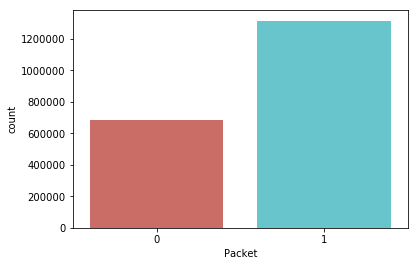

In [12]:
sns.countplot(x = y, data=data, palette='hls')

In [13]:
plt.show()

In [14]:
data.groupby(y).mean()

,Src Port,Dest Port,Protocol
Packet,,,
0,0.561283,0.855839,2.891846
1,0.756389,0.505917,1.249505


In [15]:
data.groupby(X[0]).mean()

,Dest Port,Protocol,Packet
Src Port,,,
0,0.522492,2.359211,0.515241
1,0.672618,1.567075,0.720632


In [16]:
data.groupby(X[1]).mean()

,Src Port,Protocol,Packet
Dest Port,,,
0,0.603492,1.724016,0.867731
1,0.740786,1.866296,0.530850


In [17]:
data.groupby(X[2]).mean()

,Src Port,Dest Port,Packet
Protocol,,,
0,0.000000,0.000000,0.943118
1,0.907702,0.666771,0.984563
2,0.871252,0.658867,0.542231
3,0.000000,0.963359,0.022548
4,0.000000,0.626283,0.024777
5,0.194896,0.842227,0.348028
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,0.000000
8,1.000000,0.250000,1.000000


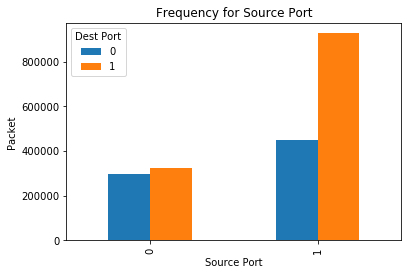

In [18]:
%matplotlib inline
pd.crosstab(data[X[0]],data[X[1]]).plot(kind='bar')
plt.title('Frequency for Source Port')
plt.xlabel('Source Port')
plt.ylabel('Packet')
plt.savefig('src-dest-packet')

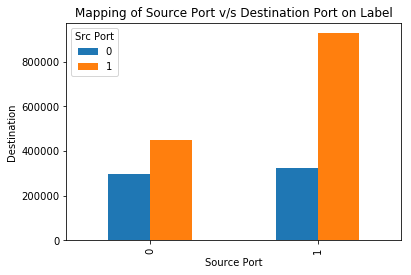

In [19]:
%matplotlib inline
pd.crosstab(data[X[1]], data[X[0]]).plot(kind='bar')
plt.title('Mapping of Source Port v/s Destination Port on Label' )
plt.xlabel('Source Port')
plt.ylabel('Destination')
plt.savefig('src-dest-packet')

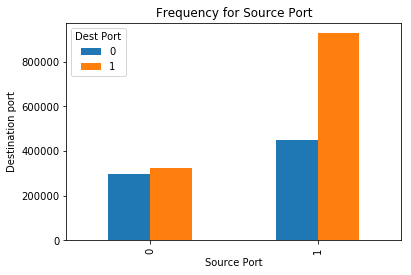

In [20]:
%matplotlib inline
pd.crosstab(data[X[0]],data[X[1]]).plot(kind='bar')
plt.title('Frequency for Source Port')
plt.xlabel('Source Port')
plt.ylabel('Destination port')
plt.savefig('src-port-packet')

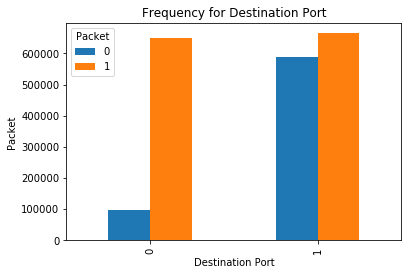

In [21]:
%matplotlib inline
pd.crosstab(data[X[1]],data[y]).plot(kind='bar')
plt.title('Frequency for Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Packet')
plt.savefig('dst-port-packet')

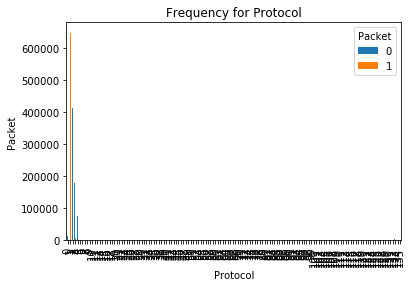

In [22]:
%matplotlib inline
plt.figure(figsize=(1,2))
pd.crosstab(data[X[2]], data[y]).plot(kind='bar')
plt.title('Frequency for Protocol')
plt.xlabel('Protocol')
plt.ylabel('Packet')
plt.savefig('protocol-packet')

In [ ]:
#sns.pairplot(data)

In [ ]:
plt.show()

In [24]:
# plt.plot( X[0], y, data=data, marker='o', color='mediumvioletred')
# plt.show()

In [ ]:
g = sns.lmplot(x=X[0], y=X[1], hue="Packet", data=data,palette="Set1")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.20, random_state=42)

In [26]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(data[y],data[X])
result=logit_model.fit()
print(result.summary())

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.539584
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Packet   No. Observations:              2000000
Model:                          Logit   Df Residuals:                  1999997
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Apr 2018   Pseudo R-squ.:                  0.1610
Time:                        12:26:01   Log-Likelihood:            -1.0792e+06
converged:                       True   LL-Null:                   -1.2862e+06
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Src Port       2.3556      0.004    626.000      0.000       2.348       2.363
Dest Port     -0.6625      0.

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.849


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[123672  13360]
 [ 46552 216416]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.90      0.81    137032
          1       0.94      0.82      0.88    262968

avg / total       0.87      0.85      0.85    400000



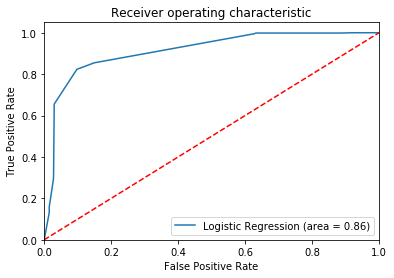

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()